# Principal Component Analysis

  ## Introduction
  
  In my journey of learning new concepts regarding Machine Learning, one of the statistical procedures that seemed very interesting to me was Principal Component Analysis or PCA. Without delving too much into the technical definition of PCA, it reduces the number of dimensions in your feature space into uncorrelated principal components ordered by the amount of variation retained from the original variables. The main reason for doing so would be let's say we are working with a dataset that has 100 different explanatory variables. Finding and fitting all the relevant variables in a model would not only be a time consuming activity but doing so in a manner where you are not violating assumptions such as multicollinearity in the process could potentially be headache inducing. I decided to explore this phenomenon in the Breast Cancer dataset within the SKLearn library. This was a great example because we are given 30 different, but potentially correlated features that could be better served as a limited number of principal components. I also wanted to test to see whether or not using PCA would have better results on the classification of "benign" or "malignant" tumors given the data set.

## Goals

1. First goal will be to load and explore the data set. See if anything quirky sticks out within the exploration
<br/>
<br/>
2. Next will be to fit training data on the both Logistic Regression and Support Vector Classifier Models to see how they perform on a test set. This will involve using the GridSearch feature from the Cross Validation library to help choose the best parameters that render the most accurate model.
<br/>
<br/>
3. After that I will prep the data for the Principal Component Analysis. I will be using Standard Scaler library on the explanatory variables to have all features on the same scale, a necessary step prior to running a Principal Component Analysis. I will also be deciding  the amount of principal components appropriate to receive the best result for classification on test data.
<br/>
<br/>
4. Once the data has been transformed into principal components I will fit this data into the models once again and see if my classification accuracy has imporved.
<br/>
<br/>
5. Evaluate the results and make conclusions.


### Data Set Information
The dataset is a description of tumors broken down by characteristcs. The tumors are classified as either being benign or malignant which will ultimately determine whether or not the woman in question has breast cancer

## Data Exploration

In [1]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
type(cancer)

sklearn.utils.Bunch

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

### Dataset
Keys represent different attributes within the cancer data set.

- Data is the raw features we will be using for our train and test set.
- Target is the response variable denoted as "1" and "0" for malignant and benign respectively.
- DESCR gives some additional information on the data set.
- Feature_Names are the column names for the dataset.

In [6]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [8]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [9]:
cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

In [10]:
#Add feature names to be our column headers
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
sns.set_style('whitegrid')

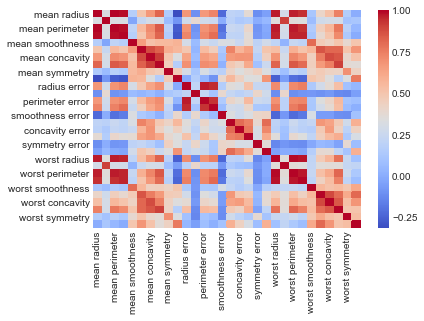

In [35]:
sns.heatmap(df.corr(),cmap='coolwarm')
#Lots of highly correlated variables given the amount of blue in the heatmap

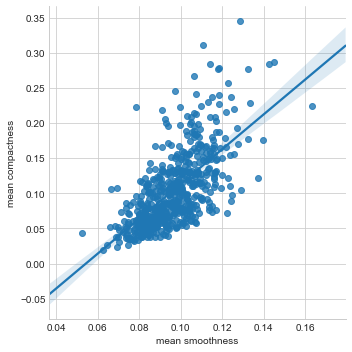

In [30]:
sns.lmplot(x='mean smoothness',y='mean compactness',data=df)

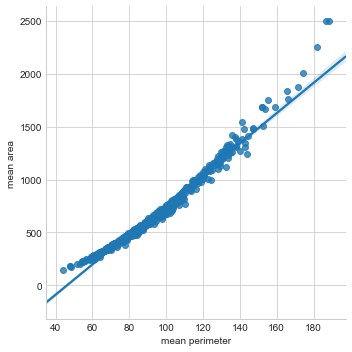

In [26]:
sns.lmplot(x='mean perimeter',y='mean area',data=df)

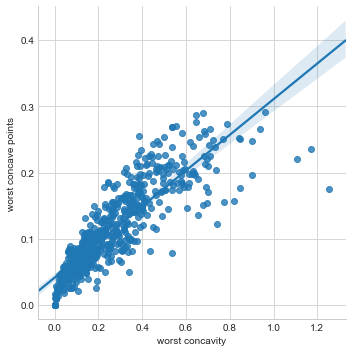

In [27]:
sns.lmplot(x='worst concavity',y='worst concave points',data=df)

I'm not an expert on cancer research, but given the names of some of the columns I expected to see highly correlated explanatory variables. As shown above this does seem to be the case. Generally when this occurs we would have to drop one or more of the variables that are highly correlated with one another, in favor of the one that has the highest amount of impact on the variation for the response variable. PCA is one of many methods that tries to accomplish this feat in a much more efficient manner. 

## Fitting Models Before PCA

Now I'm going to fit a Logistic Regression and Suppert Vector Classifier model before PCA to see how well the model performs on a test set. Using cross validation I will split the model into a training and testing data set. The model will then use GridSearchCV to decide which paramters deliver the best results for their respective model. 
<br/>
<br/>

#### Support Vector Machine
For the Support Vector Machine I decided to try different cost values, gamma values, and kernels to see which would perform best on the data. The cost function determines the penalty for misclassification of the response variable. This is a balance between variance and bias where the larger C becomes the wider the margins are for the support vector classifier and the more tolerance we have for misclassifications. This leads to potentially less bias, but more variance. The gamma parameter defines how far a training example influences the shape of the data. The smaller the gamma the more constrained and "less" complex the model will shape to the data. Last is the kernel type which as an extension of gamma will determine whether or not a linear model or an rbf model is more suitable depending on the placement of points within the decision boundary.
<br/>
<br/>

#### Logistic Regression
For the Logistic Regression Model, once again I will be using a cost function. This time I will also compare between different solvers. Some solvers such as newton-cg and lbfgs are typically used for multiclass problems while others such as liblinear is limited to one-versus-rest schemes. They also vary in speed and optimization so trying out multiple will allow us the flexibility to see which one gives us the best results.

In [53]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import random

In [14]:
#Set X and Y Variables for explanatory and response results.
X=df
y=cancer['target']

In [50]:
#Runs model with 3 different random states to compare results
lst=[]
lst2=[]
def SVM_Model():
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,100))
        param_grid={'C':[1,10,100,1000,10000],'gamma':[1,.01,.001,.0001],'kernel':['linear','rbf']}
        Grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=3)
        Grid.fit(X_train,y_train)
        Grid.best_params_
        pred=Grid.predict(X_test)
        confus=confusion_matrix(pred,y_test)
        classif = classification_report(pred,y_test)
        lst.append(confus)
        lst2.append(classif)
    return lst,lst2
def SVM_Eval(Confusion,Classification):
    print('Test 1')
    print(Confusion[0])
    print('\n')
    print(Classification[0])
    print('\n')
    print('Test 2')
    print(Confusion[1])
    print('\n')
    print(Classification[1])
    print('\n')
    print('Test 3')
    print(Confusion[2])
    print('\n')
    print(Classification[2])
Confusion, Classification = SVM_Model()

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.962406 -   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  4.3min finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.939850 -   0.7s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.954887 -   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.962121 -   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.631579 -   0.0s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s



[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.631579 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.628788 -   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.939850 -   0.7s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.954887 -   0.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.962121 -   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ............ C=1, gamma=0.01, kernel=rbf, score=0.624060 -   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ............ C=1, gamma=0.01, kernel=rbf, score=0.631579 -   0.0s
[CV] 

[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.954545 -   8.2s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.872180 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.879699 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.878788 -   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ..... C=100, gamma=0.0001, kernel=linear, score=0.932331 -   2.7s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ..... C=100, gamma=0.0001, kernel=linear, score=0.924812 -   2.1s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ..... C=100, gamma=0.0001, kernel=linear, score=0.954545 -   8.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.9min finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.955224 -   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.962121 -   0.5s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.969697 -   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.634328 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.636364 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.636364 -   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.955224 -   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.962121 -   0.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.969697 -   0.4s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.940299 -   4.5s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.946970 -   2.7s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.969697 -   4.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.895522 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.878788 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.931818 -   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ..... C=100, gamma=0.0001, kernel=linear, score=0.940299 -   3.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.1min finished


In [51]:
SVM_Eval(Confusion,Classification)

Test 1
[[ 59   3]
 [  3 106]]


             precision    recall  f1-score   support

          0       0.95      0.95      0.95        62
          1       0.97      0.97      0.97       109

avg / total       0.96      0.96      0.96       171



Test 2
[[ 63   6]
 [  2 100]]


             precision    recall  f1-score   support

          0       0.97      0.91      0.94        69
          1       0.94      0.98      0.96       102

avg / total       0.95      0.95      0.95       171



Test 3
[[ 60   1]
 [  7 103]]


             precision    recall  f1-score   support

          0       0.90      0.98      0.94        61
          1       0.99      0.94      0.96       110

avg / total       0.96      0.95      0.95       171



In [55]:
lst=[]
lst2=[]
def LG_Model():
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,100))
        param_grid_LG={'C':[1,10,100,1000,10000],'penalty':['l2'],'solver':['liblinear','saga','newton-cg','lbfgs','sag']}
        Grid_LG = GridSearchCV(LogisticRegression(),param_grid_LG,verbose=3)
        Grid_LG.fit(X_train,y_train)
        Grid_LG.best_params_
        pred=Grid_LG.predict(X_test)
        confus=confusion_matrix(pred,y_test)
        classif = classification_report(pred,y_test)
        lst.append(confus)
        lst2.append(classif)
    return lst,lst2
def LG_Eval(Confusion,Classification):
    print('Test 1')
    print(Confusion[0])
    print('\n')
    print(Classification[0])
    print('\n')
    print('Test 2')
    print(Confusion[1])
    print('\n')
    print(Classification[1])
    print('\n')
    print('Test 3')
    print(Confusion[2])
    print('\n')
    print(Classification[2])
Confusion, Classification = LG_Model()

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.947368 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.969925 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.939394 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........... C=1, penalty=l2, solver=saga, score=0.894737 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.917293 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.871212 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.947368 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.984962 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.924242 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.924812 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ............ C=1, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................
[CV] ............ C=1, penalty=l2, solver=sag, score=0.878788 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.932331 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.977444 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.924242 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.894737 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.917293 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.962406 -   0.1s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.984962 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.931818 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.954887 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.969925 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.954545 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........... C=10, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.977444 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.984962 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter

[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.916667 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.954887 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.984962 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.924242 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .......... C=100, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .......... C=100, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .......... C=100, penalty=l2, solver=sag, score=0.878788 -   0.0s
[CV] C=1000, penalty=l2, solver=liblinear ............................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ........ C=1000, penalty=l2, solver=saga, score=0.871212 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.962406 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.984962 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter

[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.939394 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.932331 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.977444 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.939394 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.878788 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.962406 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.969925 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.939394 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.932331 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.977444 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.916667 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.909774 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.878788 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, penalt

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ........... C=1, penalty=l2, solver=saga, score=0.932331 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.901515 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.894737 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.977444 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.969697 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.909774 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.947368 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.894737 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.977444 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.984848 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.909774 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.962406 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.954545 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........... C=10, penalty=l2, solver=sag, score=0.902256 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.909774 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.977444 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.984848 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.909774 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.962406 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.969697 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .......... C=100, penalty=l2, solver=sag, score=0.902256 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.924812 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.977444 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter

[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.984848 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.924812 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.954887 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.969697 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.902256 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.947368 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.916667 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.924812 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.977444 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.977273 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.909774 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.977444 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.969697 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.902256 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.947368 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.916667 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, penalt

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........... C=1, penalty=l2, solver=saga, score=0.893939 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.939850 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.932331 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.939850 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.932331 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.924242 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.932331 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.939850 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.947368 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.939850 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.969697 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........... C=10, penalty=l2, solver=sag, score=0.894737 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.954887 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.932331 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.939850 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.939850 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.931818 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .......... C=100, penalty=l2, solver=sag, score=0.894737 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.962406 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.939850 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter

[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.947368 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.932331 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.931818 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.894737 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.924812 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.886364 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.947368 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.939850 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.5s finished


[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.954545 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.947368 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.932331 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.931818 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.894737 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.924812 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.886364 -   0.0s


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [56]:
LG_Eval(Classification,Confusion)

Test 1
             precision    recall  f1-score   support

          0       0.96      0.92      0.94        60
          1       0.96      0.98      0.97       111

avg / total       0.96      0.96      0.96       171



[[ 55   5]
 [  2 109]]


Test 2
             precision    recall  f1-score   support

          0       0.86      0.95      0.90        62
          1       0.97      0.91      0.94       109

avg / total       0.93      0.92      0.92       171



[[59  3]
 [10 99]]


Test 3
             precision    recall  f1-score   support

          0       0.95      0.95      0.95        56
          1       0.97      0.97      0.97       115

avg / total       0.96      0.96      0.96       171



[[ 53   3]
 [  3 112]]


### Results Before PCA

Wow both of our models performed great on our test data among different random splits. Our average 
F1 Score for the Support Vector Machine was .953 while for the Logistic Regresion the average score was .947. For most real world models these scores would be astounding. However, for the sake of this experiment I'm interested to see whether or not PCA can improve on these scores. 

### Scaling Data

In order for PCA to work we need to scale our data to have a mean of 0 and a standard deviation of 1. Since some of the variables maybe recorded in different units it's import to scale our featueres so that one variable doesn't outweight another in terms of variance in our principal components. 

In [57]:
def Scaled():
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(df)
    scaled_data = scaler.transform(df)
    return scaled_data
scaled_data = Scaled()

In [58]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)

After scaling the data and fitting the data to a PCA model. It's necessary to see how many components we should be using to predict our classification labels. 

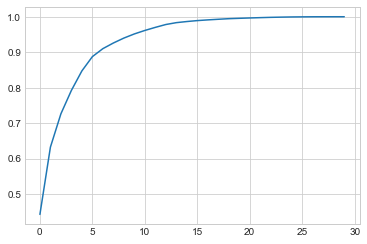

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

From the above plot it seems that roughly 5 PCA components explain roughly 90% of the variance of the data. For our purposes I believe that is more than good enough, especially since looking at the plot we see stark diminishing returns after 5 components.

In [60]:
def PCA_fit():
    pca = PCA(n_components=5)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    return x_pca
x_pca = PCA_fit()

In [74]:
#From 30 Features
df.shape

(569, 30)

In [75]:
#To 5 Features
x_pca.shape

(569, 5)

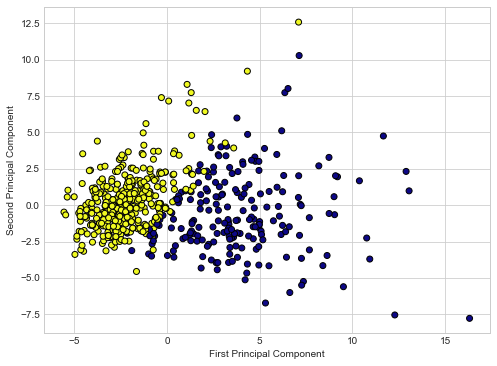

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma',edgecolor='black')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Using just the first two principal components we can see clearly how by using PCA we are able to separate fairly well the difference between the malignant and benign tumors

### Final Model Fit

Our final step will be to turn our new principal components into a dataframe and then fit a Support Vector and Logistic Regression Model again to see whether or not this improves our accuracy from before.

In [69]:
lst=[]
lst2=[]
x_pca = pd.DataFrame(x_pca)
def SVM_PCA_Model():
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,100))
        param_grid={'C':[1,10,100,1000,10000],'gamma':[1,.01,.001,.0001],'kernel':['linear','rbf']}
        Grid_SVPCA = GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=3)
        Grid_SVPCA.fit(X_train,y_train)
        Grid_SVPCA.best_params_
        pred=Grid_SVPCA.predict(X_test)
        confus=confusion_matrix(pred,y_test)
        classif = classification_report(pred,y_test)
        lst.append(confus)
        lst2.append(classif)
    return lst,lst2
def SVM_PCA_Eval(Confusion,Classification):
    print('Test 1')
    print(Confusion[0])
    print('\n')
    print(Classification[0])
    print('\n')
    print('Test 2')
    print(Confusion[1])
    print('\n')
    print(Classification[1])
    print('\n')
    print('Test 3')
    print(Confusion[2])
    print('\n')
    print(Classification[2])
Confusion, Classification = SVM_PCA_Model()

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.947368 -   0.9s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.939850 -   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.931818 -   0.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.631579 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.631579 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.636364 -   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.947368 -   1.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.939850 -   0.2s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.931818 -   1.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.977444 -   8.9s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.924812 -   3.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.946970 -   4.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.887218 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.909774 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.939394 -   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ..... C=100, gamma=0.0001, kernel=linear, score=0.977444 -   8.2s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.8min finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.954887 -   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.977444 -   0.2s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.969697 -   0.8s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.631579 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.631579 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.628788 -   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.954887 -   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.977444 -   0.2s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.969697 -   0.9s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.977444 -   1.9s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.962406 -   9.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.977273 -   2.8s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.939850 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.917293 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.916667 -   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ..... C=100, gamma=0.0001, kernel=linear, score=0.977444 -   1.5s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.6min finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ............ C=1, gamma=1, kernel=linear, score=0.954887 -   1.0s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.887218 -   0.6s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=linear, score=0.977273 -   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.616541 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.616541 -   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............... C=1, gamma=1, kernel=rbf, score=0.621212 -   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.954887 -   1.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.887218 -   0.6s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ......... C=1, gamma=0.01, kernel=linear, score=0.977273 -   0.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.939850 -   3.6s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.924812 -   7.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ...... C=100, gamma=0.001, kernel=linear, score=0.954545 -   2.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.902256 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.864662 -   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ......... C=100, gamma=0.001, kernel=rbf, score=0.939394 -   0.0s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ..... C=100, gamma=0.0001, kernel=linear, score=0.939850 -   4.5s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  6.5min finished


In [70]:
SVM_PCA_Eval(Confusion,Classification)

Test 1
[[ 64   3]
 [  2 102]]


             precision    recall  f1-score   support

          0       0.97      0.96      0.96        67
          1       0.97      0.98      0.98       104

avg / total       0.97      0.97      0.97       171



Test 2
[[ 58   6]
 [  7 100]]


             precision    recall  f1-score   support

          0       0.89      0.91      0.90        64
          1       0.94      0.93      0.94       107

avg / total       0.92      0.92      0.92       171



Test 3
[[ 58   1]
 [  2 110]]


             precision    recall  f1-score   support

          0       0.97      0.98      0.97        59
          1       0.99      0.98      0.99       112

avg / total       0.98      0.98      0.98       171



In [72]:
lst=[]
lst2=[]
def LG_PCA_Model():
    for i in range(3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(1,100))
        param_grid_LGPCA={'C':[1,10,100,1000,10000],'penalty':['l2'],'solver':['liblinear','saga','newton-cg','lbfgs','sag']}
        Grid_LGPCA = GridSearchCV(LogisticRegression(),param_grid_LGPCA,verbose=3)
        Grid_LGPCA.fit(X_train,y_train)
        Grid_LGPCA.best_params_
        pred=Grid_LGPCA.predict(X_test)
        confus=confusion_matrix(pred,y_test)
        classif = classification_report(pred,y_test)
        lst.append(confus)
        lst2.append(classif)
    return lst,lst2
def LG_PCA_Eval(Confusion,Classification):
    print('Test 1')
    print(Confusion[0])
    print('\n')
    print(Classification[0])
    print('\n')
    print('Test 2')
    print(Confusion[1])
    print('\n')
    print(Classification[1])
    print('\n')
    print('Test 3')
    print(Confusion[2])
    print('\n')
    print(Classification[2])
Confusion, Classification = LG_PCA_Model()

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.970149 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.924242 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.909091 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.932836 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.886364 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.878788 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.924242 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.924242 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.947761 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.924242 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.909091 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................
[CV] ............ C=1, penalty=l2, solver=sag, score=0.940299 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................
[CV] ............ C=1, penalty=l2, solver=sag, score=0.893939 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma


[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.931818 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.932836 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.886364 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.878788 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.977612 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.931818 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.931818 -   0.0s
[CV] 

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ........... C=10, penalty=l2, solver=sag, score=0.893939 -   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .... C=100, penalty=l2, solver=liblinear, score=0.970149 -   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .... C=100, penalty=l2, solver=liblinear, score=0.931818 -   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .... C=100, penalty=l2, solver=liblinear, score=0.939394 -   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.932836 -   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.886364 -   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.878788 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ........ C=1000, penalty=l2, solver=saga, score=0.886364 -   0.0s
[CV] C=1000, penalty=l2, solver=saga .................................
[CV] ........ C=1000, penalty=l2, solver=saga, score=0.878788 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.962687 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.946970 -   0.1s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.931818 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.947761 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.939394 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.939394 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.940299 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.893939 -   0.0s

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma


[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.893939 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .. C=10000, penalty=l2, solver=liblinear, score=0.977612 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .. C=10000, penalty=l2, solver=liblinear, score=0.931818 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .. C=10000, penalty=l2, solver=liblinear, score=0.931818 -   0.0s
[CV] C=10000, penalty=l2, solver=saga ................................
[CV] ....... C=10000, penalty=l2, solver=saga, score=0.932836 -   0.0s
[CV] C=10000, penalty=l2, solver=saga ................................
[CV] ....... C=10000, penalty=l2, solver=saga, score=0.886364 -   0.0s
[CV] C=10000, penalty=l2, solver=saga ................................
[CV] ....... C=10000, penalty=l2, solver=saga, score=0.878788 -   0.0s
[CV] 

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.946970 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.931818 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.947761 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.939394 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.909091 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.940299 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.6s finished


[CV] ........ C=10000, penalty=l2, solver=sag, score=0.893939 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.893939 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.947761 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.946970 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.969697 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.895522 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ........... C=1, penalty=l2, solver=saga, score=0.909091 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.916667 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.955224 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.954545 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.969697 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.940299 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.946970 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ............ C=1, penalty=l2, solver=sag, score=0.939394 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.947761 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.946970 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.962121 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.895522 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.909091 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.916667 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma


[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.895522 -   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.909091 -   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.916667 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.955224 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.954545 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.969697 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.932836 -   0.0s
[CV] 

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ........ C=1000, penalty=l2, solver=saga, score=0.895522 -   0.0s
[CV] C=1000, penalty=l2, solver=saga .................................
[CV] ........ C=1000, penalty=l2, solver=saga, score=0.909091 -   0.0s
[CV] C=1000, penalty=l2, solver=saga .................................
[CV] ........ C=1000, penalty=l2, solver=saga, score=0.916667 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.955224 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.954545 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.969697 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.940299 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.939394 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.962121 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.917910 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter

[CV] ......... C=1000, penalty=l2, solver=sag, score=0.909091 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.939394 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .. C=10000, penalty=l2, solver=liblinear, score=0.947761 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .. C=10000, penalty=l2, solver=liblinear, score=0.946970 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .. C=10000, penalty=l2, solver=liblinear, score=0.954545 -   0.0s
[CV] C=10000, penalty=l2, solver=saga ................................
[CV] ....... C=10000, penalty=l2, solver=saga, score=0.895522 -   0.0s
[CV] C=10000, penalty=l2, solver=saga ................................
[CV] ....... C=10000, penalty=l2, solver=saga, score=0.909091 -   0.0s
[CV] C=10000, penalty=l2, solver=saga ................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.955224 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.939394 -   0.1s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.947761 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.939394 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.954545 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.917910 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.909091 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.939394 -   0.0s


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.962687 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.946970 -   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ...... C=1, penalty=l2, solver=liblinear, score=0.962121 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.902985 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.901515 -   0.0s
[CV] C=1, penalty=l2, solver=saga ....................................
[CV] ........... C=1, penalty=l2, solver=saga, score=0.924242 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1,

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.946970 -   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ...... C=1, penalty=l2, solver=newton-cg, score=0.977273 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.962687 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.931818 -   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................
[CV] .......... C=1, penalty=l2, solver=lbfgs, score=0.969697 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ............ C=1, penalty=l2, solver=sag, score=0.910448 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................
[CV] ............ C=1, penalty=l2, solver=sag, score=0.909091 -   0.0s
[CV] C=1, penalty=l2, solver=sag .....................................
[CV] ............ C=1, penalty=l2, solver=sag, score=0.924242 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.970149 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.962121 -   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] ..... C=10, penalty=l2, solver=liblinear, score=0.969697 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .......... C=10, penalty=l2, solver=saga, score=0.902985 -   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.947761 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ..... C=10, penalty=l2, solver=newton-cg, score=0.977273 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.962687 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.946970 -   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ......... C=10, penalty=l2, solver=lbfgs, score=0.969697 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........... C=10, penalty=l2, solver=sag, score=0.910448 -   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ......... C=100, penalty=l2, solver=saga, score=0.902985 -   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.901515 -   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ......... C=100, penalty=l2, solver=saga, score=0.924242 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.977612 -   0.1s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=100, penalty=l2, solver=newton-cg .............................
[CV] .... C=100, penalty=l2, solver=newton-cg, score=0.969697 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.940299 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.931818 -   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV] ........ C=100, penalty=l2, solver=lbfgs, score=0.969697 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .......... C=100, penalty=l2, solver=sag, score=0.910448 -   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The ma

[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.970149 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................
[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.939394 -   0.0s
[CV] C=1000, penalty=l2, solver=newton-cg ............................


C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter

[CV] ... C=1000, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.962687 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.924242 -   0.0s
[CV] C=1000, penalty=l2, solver=lbfgs ................................
[CV] ....... C=1000, penalty=l2, solver=lbfgs, score=0.977273 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.910448 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.909091 -   0.0s
[CV] C=1000, penalty=l2, solver=sag ..................................
[CV] ......... C=1000, penalty=l2, solver=sag, score=0.924242 -   0.0s
[CV] C=10000, penalty=l2, solver=liblinear ...........................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to 

[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.916667 -   0.0s
[CV] C=10000, penalty=l2, solver=newton-cg ...........................
[CV] .. C=10000, penalty=l2, solver=newton-cg, score=0.962121 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.947761 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.931818 -   0.0s
[CV] C=10000, penalty=l2, solver=lbfgs ...............................
[CV] ...... C=10000, penalty=l2, solver=lbfgs, score=0.977273 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.910448 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] ........ C=10000, penalty=l2, solver=sag, score=0.909091 -   0.0s
[CV] C=10000, penalty=l2, solver=sag .................................
[CV] .

C:\Users\Patrick Prothro\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.8s finished


In [73]:
LG_PCA_Eval(Classification,Confusion)

Test 1
             precision    recall  f1-score   support

          0       1.00      0.93      0.96        56
          1       0.97      1.00      0.98       115

avg / total       0.98      0.98      0.98       171



[[ 52   4]
 [  0 115]]


Test 2
             precision    recall  f1-score   support

          0       0.89      0.94      0.91        66
          1       0.96      0.92      0.94       105

avg / total       0.93      0.93      0.93       171



[[62  4]
 [ 8 97]]


Test 3
             precision    recall  f1-score   support

          0       0.86      0.98      0.92        51
          1       0.99      0.93      0.96       120

avg / total       0.95      0.95      0.95       171



[[ 50   1]
 [  8 112]]


### Final Results

Drum roll please... In the least pleasing yet oft answer to many questions related to statistics, "it's hard to tell." Using our PCA transformed data set we received an average F1 score for the Support Vector Machine of .956 while the average F1 score for the Logistic Regression was .953. Both models did better than their respective non-transformed data counterparts, however I wouldn't say the difference is significant enough to conclude that the PCA data did better at classification than the raw data. For us to come up with a definite answer, we would have to run many more than 3 simulations for each model. Something I might explore at a later time and update my findings with. There is some room for optimism however, both the PCA version of the SVM and Logistic Regression had highs of F1 score of 98% while their counterparts highs were only 96%. Once again too small of a sample size to come up with a sweeping conclusion, but something potentially to look out for given more simulations are ran.

### Notes
#### Problems With PCA
One of the big problems with PCA is lack of interpretation. We have a model that is doing well, but it's hard to tell how we got there, by that I mean just how much did each variable contribute to each component. Of that, how much is actually helping predict the response variables. The other problem with PCA is that we have to assume a normal distribution among the features used, otherwise you might run into the problem of one features outliers dominanting the weight of a principal component. To rememdy this I would suggest potentially transforming your data into logarthmic form.

<br/>
#### Things I would Do Differently
- I would use GridSearch once, maybe twice to find the best model parameters and then run mutliple simulations of models. As I found out running GridSearch was very time-consuming process and would be potentially be unfeasible if I were to run a simulation of 10,000 models on my personal computer.
- I would defintely do a deeper dive to get a feel for the raw features and the problem as a whole.
- More Visualizations is never a bad thing.

<br/>
#### Closing Words
I had a lot of fun working on this project, as I would consider it my first full fledged data science project. I hope to bring more content, better, results, and more insight as a continue my education in the realm of Data Science